# Missouri Schools Cohort Analysis
## Student Name: Kim Leach https://github.com/Kleach112/620-mod7

## Introduction
In this analysis, I will explore and analyze building demographic data for every school building in the state from 2006 to 2022. The dataset provides valuable information about schools' characteristics, including enrollment count, free & reduced lunch percentage, and other demographic indicators.

## Purpose and Objectives
The primary purpose of this project is to gain insights into the educational landscape of the state by examining the demographic trends of school districts and individual school buildings. By grouping districts and buildings based on certain criteria, such as enrollment count and free & reduced lunch percentage, we aim to identify similarities, disparities, and significant patterns among them.

## Data Source
For this analysis, I have collected a comprehensive dataset from the Department of Elementary and Secondary Education, which includes demographic data for each school building within the state. The dataset spans from 2006 to 2022, providing a substantial timeline to observe changes and trends over the years.

## Methodology
I will use Python programming language and popular data manipulation libraries like pandas for data cleaning, preprocessing, and analysis. Through exploratory data analysis, data visualization, and cohort creation techniques, I will organize the schools into meaningful groups to better understand the educational landscape of the state.

## Project Outline
1. Data Loading and Preprocessing: I will begin by loading the data from the Excel file, cleaning it, and preparing it for analysis.
2. Cohort Creation: Using certain demographic criteria, I will create cohorts for both school districts and individual school buildings.
3. Data Analysis: Through descriptive statistics and data visualization, I will examine the characteristics and trends within each cohort.

## References
Data Portal Reference:
Title: Missouri Comprehensive Data System (MCDS)
URL: https://apps.dese.mo.gov/MCDS/home.aspx

Chat GPT Reference:
Model Name: Chat GPT
Version: GPT-3.5 (OpenAI)
Model Architecture: Transformer-based Language Model
Developer: OpenAI


In [4]:
import os
import requests
from urllib.parse import urlsplit

def download_excel_file():
    # Prompt the user to enter the link to the Excel file
    excel_file_url = input("Enter the link to the Excel file to download: ")

    # Specify the folder path where you want to save the downloaded file
    output_folder = r"C:\Users\kaleach\OneDrive - The School District of Springfield R-12\Desktop\Grad_School\SY2023\44-620\Module7\620-mod7"

    # Create the folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # Extract the file name from the URL using urlsplit
    file_name = os.path.basename(urlsplit(excel_file_url).path)

    # Generate the full file path for saving the Excel file
    output_file_path = os.path.join(output_folder, file_name)

    try:
        # Send a GET request to the URL to download the file
        response = requests.get(excel_file_url)
        response.raise_for_status()  # Check for any request errors

        # Save the file locally in the specified folder
        with open(output_file_path, "wb") as file:
            file.write(response.content)

        print(f"Excel file downloaded and saved as: {output_file_path}")
        return output_file_path

    except requests.exceptions.RequestException as e:
        print(f"Error occurred while downloading the file: {e}")
        return None

# Call the function to start the process and get the downloaded file path
file_path_map_eoc = download_excel_file()

# If the file was downloaded successfully, proceed with the rest of the code
if file_path_map_eoc:
    # Your code for processing the downloaded Excel file and other tasks can go here
    # For example, you can call other functions to perform the required operations on the Excel file.
    pass


Excel file downloaded and saved as: C:\Users\kaleach\OneDrive - The School District of Springfield R-12\Desktop\Grad_School\SY2023\44-620\Module7\620-mod7\FileDownloadWebHandler.ashx


In [8]:
import pandas as pd

# Specify the file path of the Excel file
excel_file_path = "C:/Users/kaleach/OneDrive - The School District of Springfield R-12/Desktop/Grad_School/SY2023/44-620/Module7/620-mod7/FileDownloadWebHandler.ashx"

# Load the Excel file into a pandas DataFrame
df = pd.read_excel(excel_file_path)

# Filter rows with * in the ENROLLMENT_GRADES_K_12 column
df_cleaned = df[~df['ENROLLMENT_GRADES_K_12'].astype(str).str.contains('\*')]

# Specify the file path for the cleaned Excel file
output_cleaned_file_path = "C:/Users/kaleach/OneDrive - The School District of Springfield R-12/Desktop/Grad_School/SY2023/44-620/Module7/620-mod7/cleaned_data.xlsx"

# Save the cleaned DataFrame to a new Excel file
df_cleaned.to_excel(output_cleaned_file_path, index=False)

print(f"Rows with * in the ENROLLMENT_GRADES_K_12 column removed and saved to: {output_cleaned_file_path}")


Rows with * in the ENROLLMENT_GRADES_K_12 column removed and saved to: C:/Users/kaleach/OneDrive - The School District of Springfield R-12/Desktop/Grad_School/SY2023/44-620/Module7/620-mod7/cleaned_data.xlsx


In [10]:
# Specify the file path of the cleaned Excel file
cleaned_excel_file_path = "C:/Users/kaleach/OneDrive - The School District of Springfield R-12/Desktop/Grad_School/SY2023/44-620/Module7/620-mod7/cleaned_data.xlsx"

# Load the cleaned Excel file into a pandas DataFrame
df_cleaned = pd.read_excel(cleaned_excel_file_path)

# Create a new column by combining the county_district_code and school_code
df_cleaned['building_identifier'] = df_cleaned['COUNTY_DISTRICT_CODE'].astype(str) + '-' + df_cleaned['SCHOOL_CODE'].astype(str)

# Save the DataFrame with the new column back to the cleaned Excel file
df_cleaned.to_excel(cleaned_excel_file_path, index=False)

print(f"New column 'building_identifier' created and saved to: {cleaned_excel_file_path}")


New column 'building_identifier' created and saved to: C:/Users/kaleach/OneDrive - The School District of Springfield R-12/Desktop/Grad_School/SY2023/44-620/Module7/620-mod7/cleaned_data.xlsx


In [19]:
import pandas as pd

# Specify the file path of the Excel file
buildings_file_path = "C:/Users/kaleach/OneDrive - The School District of Springfield R-12/Desktop/Grad_School/SY2023/44-620/Module7/620-mod7/School_Building_List.xlsx"

# Load the cleaned Excel file into a pandas DataFrame
bldgs = pd.read_excel(buildings_file_path)

# Create the 'building_identifier' column by combining the 'COUNTY_DISTRICT_CODE' and 'SCHOOL_CODE'
bldgs ['building_identifier'] = bldgs ['CTYDIST'].astype(str) + '-' + bldgs ['SCHNUM'].astype(str)

# Save the DataFrame with the new 'building_identifier' column back to the cleaned Excel file
bldgs.to_excel(buildings_file_path, index=False)

print(f"Building identifiers created and saved to: {buildings_file_path}")


Building identifiers created and saved to: C:/Users/kaleach/OneDrive - The School District of Springfield R-12/Desktop/Grad_School/SY2023/44-620/Module7/620-mod7/School_Building_List.xlsx


In [20]:
# Specify the file path of the cleaned Excel file
original_file_path = "C:/Users/kaleach/OneDrive - The School District of Springfield R-12/Desktop/Grad_School/SY2023/44-620/Module7/620-mod7/cleaned_data.xlsx"

# Load the cleaned Excel file into a pandas DataFrame
df = pd.read_excel(original_file_path)

# Rest of your data processing and modifications...

# Specify the new file name
new_file_name = "bldg_demographics.xlsx"

# Get the directory path of the original file
file_directory = os.path.dirname(original_file_path)

# Generate the new file path by combining the directory path and the new file name
new_file_path = os.path.join(file_directory, new_file_name)

# Save the DataFrame with the new file name
df.to_excel(new_file_path, index=False)

print(f"File has been renamed to: {new_file_path}")


File has been renamed to: C:/Users/kaleach/OneDrive - The School District of Springfield R-12/Desktop/Grad_School/SY2023/44-620/Module7/620-mod7\bldg_demographics.xlsx


In [21]:
# Load the School_Building_List Excel file into a pandas DataFrame
file_path = "C:/Users/kaleach/OneDrive - The School District of Springfield R-12/Desktop/Grad_School/SY2023/44-620/Module7/620-mod7/School_Building_List.xlsx"
df = pd.read_excel(file_path)

# Function to find the column with a 'Y' for each row
def find_building_type(row):
    for column in df.columns:
        if row[column] == 'Y':
            return column
    return None

# Apply the function to each row and create a new column 'building_type'
df['building_type'] = df.apply(find_building_type, axis=1)

# Save the DataFrame with the new 'building_type' column back to the Excel file
df.to_excel(file_path, index=False)

print(f"Building types identified and saved to: {file_path}")


Building types identified and saved to: C:/Users/kaleach/OneDrive - The School District of Springfield R-12/Desktop/Grad_School/SY2023/44-620/Module7/620-mod7/School_Building_List.xlsx


In [27]:
# Load the bldg_demographics.xlsx file into a pandas DataFrame
file_path = "C:/Users/kaleach/OneDrive - The School District of Springfield R-12/Desktop/Grad_School/SY2023/44-620/Module7/620-mod7/bldg_demographics.xlsx"
df = pd.read_excel(file_path)

# Convert the 'YEAR' column to numeric (assuming it contains year values as integers)
df['YEAR'] = pd.to_numeric(df['YEAR'], errors='coerce')

# Sort the DataFrame based on the 'YEAR' column in descending order
df.sort_values(by='YEAR', ascending=False, inplace=True)

# Group by 'building_identifier' and get the most recent 5 years for each group
filtered_df = df.groupby('building_identifier').head(5)

# Create the new file name based on the span of years
most_recent_years = filtered_df['YEAR'].unique().tolist()
file_name = f"bldg_demographics_{most_recent_years[0]}-{most_recent_years[-1]}.xlsx"

# Save the filtered DataFrame as a new Excel file
filtered_df.to_excel(file_name, index=False)

print(f"Data for the most recent years ({most_recent_years}) saved to: {file_name}")

Data for the most recent years ([2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006]) saved to: bldg_demographics_2022-2006.xlsx


In [4]:
import pandas as pd

# Specify the file path of the cleaned Excel file
cleaned_file_path = "C:/Users/kaleach/OneDrive - The School District of Springfield R-12/Desktop/Grad_School/SY2023/44-620/Module7/620-mod7/bldg_demographics.xlsx"

# Load the cleaned Excel file into a pandas DataFrame
df = pd.read_excel(cleaned_file_path)

# Remove rows with * in the LUNCH_COUNT_FREE_REDUCED_PCT column
df_cleaned = df[~df['LUNCH_COUNT_FREE_REDUCED_PCT'].astype(str).str.contains('\*')]

# Specify the output file path for the averages
output_file_path = "C:/Users/kaleach/OneDrive - The School District of Springfield R-12/Desktop/Grad_School/SY2023/44-620/Module7/620-mod7/bldg_demographics_averages.xlsx"

# Group by building_identifier and calculate the averages for the specified columns
grouped = df_cleaned.groupby('building_identifier').agg({
    'LUNCH_COUNT_FREE_REDUCED': 'mean',
    'LUNCH_COUNT_FREE_REDUCED_PCT': 'mean',
    'ENROLLMENT_GRADES_K_12': 'mean',
    'COUNTY_DISTRICT_CODE': 'first',
    'DISTRICT_NAME': 'first',
    'SCHOOL_CODE': 'first',
    'SCHOOL_NAME': 'first'
}).reset_index()

# Specify the file path of the School_Building_List.xlsx file
building_list_file_path = "C:/Users/kaleach/OneDrive - The School District of Springfield R-12/Desktop/Grad_School/SY2023/44-620/Module7/620-mod7/School_Building_List.xlsx"

# Load the School_Building_List.xlsx file into a pandas DataFrame
building_list_df = pd.read_excel(building_list_file_path)

# Merge the grouped DataFrame with the building_list_df on building_identifier
result_df = pd.merge(grouped, building_list_df[['building_identifier', 'building_type']], on='building_identifier', how='left')

# Fill the blank values in the building_type column based on the SCHOOL_NAME column
def fill_building_type(row):
    if 'HIGH' in row['SCHOOL_NAME']:
        return 'HIGH SCHOOL'
    elif 'MIDDLE' in row['SCHOOL_NAME']:
        return 'MIDDLE SCHOOL'
    elif 'ELEM' in row['SCHOOL_NAME']:
        return 'ELEM SCHOOL'
    return row['building_type']

result_df['building_type'] = result_df.apply(fill_building_type, axis=1)

# Remove rows where building_type is blank or not in the specified list
valid_building_types = ['HIGH SCHOOL', 'MIDDLE SCHOOL', 'ELEM SCHOOL']
result_df = result_df[result_df['building_type'].isin(valid_building_types)]

# Save the final DataFrame with averages and additional columns to the output file
result_df.to_excel(output_file_path, index=False)

print(f"Averages and additional columns with building_type added saved to: {output_file_path}")


Averages and additional columns with building_type added saved to: C:/Users/kaleach/OneDrive - The School District of Springfield R-12/Desktop/Grad_School/SY2023/44-620/Module7/620-mod7/bldg_demographics_averages.xlsx


In [14]:
import pandas as pd

# Load the bldg_demographics_averages.xlsx file into a pandas DataFrame
file_path = "C:/Users/kaleach/OneDrive - The School District of Springfield R-12/Desktop/Grad_School/SY2023/44-620/Module7/620-mod7/bldg_demographics_averages.xlsx"
df = pd.read_excel(file_path)

# Define the enrollment_code calculation function
def calculate_enrollment_code(row):
    total_rows = len(df[df['building_type'] == row['building_type']])
    rank = df[df['building_type'] == row['building_type']]['ENROLLMENT_GRADES_K_12'].rank().loc[row.name]
    enrollment_percentage = (rank - 1) / (total_rows - 1)
    
    if row['building_type'] == 'ELEM SCHOOL':
        if enrollment_percentage <= 0.25:
            return 1
        elif 0.25 < enrollment_percentage <= 0.5:
            return 2
        elif 0.5 < enrollment_percentage <= 0.75:
            return 3
        else:
            return 4
    elif row['building_type'] == 'MIDDLE SCHOOL':
        if enrollment_percentage <= 0.25:
            return 1
        elif 0.25 < enrollment_percentage <= 0.5:
            return 2
        elif 0.5 < enrollment_percentage <= 0.75:
            return 3
        else:
            return 4
    elif row['building_type'] == 'HIGH SCHOOL':
        if enrollment_percentage <= 0.25:
            return 1
        elif 0.25 < enrollment_percentage <= 0.5:
            return 2
        elif 0.5 < enrollment_percentage <= 0.75:
            return 3
        else:
            return 4
    else:
        return None

# Define the FRL_CODE calculation function
def calculate_frl_code(row):
    total_rows = len(df[df['building_type'] == row['building_type']])
    rank = df[df['building_type'] == row['building_type']]['LUNCH_COUNT_FREE_REDUCED_PCT'].rank().loc[row.name]
    frl_percentage = (rank - 1) / (total_rows - 1)
    
    if frl_percentage <= 0.25:
        return 1
    elif 0.25 < frl_percentage <= 0.5:
        return 2
    elif 0.5 < frl_percentage <= 0.75:
        return 3
    else:
        return 4

# Apply the enrollment_code calculation to create the 'enrollment_code' column
df['enrollment_code'] = df.apply(calculate_enrollment_code, axis=1)

# Apply the FRL_CODE calculation to create the 'FRL_CODE' column
df['FRL_CODE'] = df.apply(calculate_frl_code, axis=1)

# Create the 'comparison_code' column by combining 'enrollment_code' and 'FRL_CODE' with a period delimiter
df['comparison_code'] = df['enrollment_code'].astype(str) + '.' + df['FRL_CODE'].astype(str)

# Save the updated DataFrame back to the bldg_demographics_averages.xlsx file
df.to_excel(file_path, index=False)

# Display the DataFrame with the new 'comparison_code' column
print(df)


     building_identifier  LUNCH_COUNT_FREE_REDUCED  \
0            100059-1050                 99.529412   
1            100059-3000                138.588235   
2            100059-4020                198.429412   
3            100060-1050                126.941176   
4            100060-4020                247.352941   
...                  ...                       ...   
2373          98080-3000                 61.500000   
2374          98080-4020                186.764706   
2375          99078-4020                 22.300000   
2376          99082-1050                127.647059   
2377          99082-4040                161.688235   

      LUNCH_COUNT_FREE_REDUCED_PCT  ENROLLMENT_GRADES_K_12  \
0                        41.282353              285.117647   
1                        53.741176              259.411765   
2                        59.582353              335.352941   
3                        44.982353              287.941176   
4                        75.358824       

In [15]:
# Load the bldg_demographics_averages.xlsx file into a pandas DataFrame
file_path = "C:/Users/kaleach/OneDrive - The School District of Springfield R-12/Desktop/Grad_School/SY2023/44-620/Module7/620-mod7/bldg_demographics_averages.xlsx"
df = pd.read_excel(file_path)

# Filter the DataFrame to show only the high schools in the first quartile for enrollment_code
high_schools_first_quartile_enrollment = df.loc[(df['building_type'] == 'HIGH SCHOOL') & (df['enrollment_code'] == 1)]

# Filter the DataFrame to show only the high schools in the second quartile for FRL_CODE
high_schools_second_quartile_frl = df.loc[(df['building_type'] == 'HIGH SCHOOL') & (df['FRL_CODE'] == 2)]

# Display the high schools in the first quartile for enrollment_code
print("High Schools in the First Quartile for Enrollment Code:")
print(high_schools_first_quartile_enrollment)

# Display the high schools in the second quartile for FRL_CODE
print("High Schools in the Second Quartile for FRL Code:")
print(high_schools_second_quartile_frl)


High Schools in the First Quartile for Enrollment Code:
     building_identifier  LUNCH_COUNT_FREE_REDUCED  \
8            100062-1050                117.588235   
30            10090-1050                 41.576471   
40            10093-1020                116.194118   
73           101105-1050                115.529412   
75           101107-1050                104.905882   
...                  ...                       ...   
2229          96095-1085                 33.640000   
2348          96119-1059                 52.675000   
2349          96119-1069                 28.125000   
2357          97119-1050                 31.005882   
2368          97130-1050                 55.764706   

      LUNCH_COUNT_FREE_REDUCED_PCT  ENROLLMENT_GRADES_K_12  \
8                        80.023529              153.941176   
30                       34.000000              136.588235   
40                       83.088235              151.470588   
73                       77.623529             

In [16]:
import pandas as pd
import requests
import os

def download_excel_file():
    # Prompt the user to enter the link to download the Excel file
    excel_link = input("Enter the link to download the Excel file: ")

    # Download the Excel file from the link
    response = requests.get(excel_link)
    if response.status_code == 200:
        # Get the file name from the link
        filename = os.path.basename(excel_link)

        # Save the Excel file in the specified folder with the desired name
        destination_folder = "C:/Users/kaleach/OneDrive - The School District of Springfield R-12/Desktop/Grad_School/SY2023/44-620/Module7/620-mod7"
        year = pd.read_excel(response.content)['YEAR'].iloc[0]
        file_path = f"{destination_folder}/MAP_EOC_FY_{year}.xlsx"
        with open(file_path, 'wb') as f:
            f.write(response.content)

        print(f"File downloaded and saved as '{file_path}'.")
        return file_path
    else:
        print("Failed to download the Excel file. Please check the link and try again.")
        return None

# Call the function to start the process
excel_file_path = download_excel_file()


Enter the link to download the Excel file:  https://apps.dese.mo.gov/MCDS/FileDownloadWebHandler.ashx?filename=c41fccbb-6958School%20--%20content%20area%20and%20grade%20all%20and%20disag%202022.xlsx


File downloaded and saved as 'C:/Users/kaleach/OneDrive - The School District of Springfield R-12/Desktop/Grad_School/SY2023/44-620/Module7/620-mod7/MAP_EOC_FY_2022.xlsx'.


In [17]:
def process_excel_file(file_path):
    if file_path is None:
        return

    # Read the downloaded Excel file into a DataFrame
    df = pd.read_excel(file_path)

    # Create a new column for the building_identifier using COUNTY_DISTRICT and SCHOOL_CODE
    df['building_identifier'] = df['COUNTY_DISTRICT'].astype(str) + '-' + df['SCHOOL_CODE'].astype(str)

    # Load the bldg_demographics_averages file into another DataFrame
    averages_file_path = "C:/Users/kaleach/OneDrive - The School District of Springfield R-12/Desktop/Grad_School/SY2023/44-620/Module7/620-mod7/bldg_demographics_averages.xlsx"
    df_averages = pd.read_excel(averages_file_path)

    # Perform an inner join with bldg_demographics_averages to keep only matching rows
    df_filtered = df.merge(df_averages['building_identifier'], on='building_identifier', how='inner')

    # Create the 'comparison_code' column by merging with bldg_demographics_averages
    df_filtered = df_filtered.merge(df_averages[['building_identifier', 'comparison_code']], on='building_identifier', how='left')

    # Save the updated DataFrame back to the Excel file
    df_filtered.to_excel(file_path, index=False)

    print("Filtered DataFrame with matching unique identifiers and new columns saved to the Excel file.")

# Process the Excel file and update it with the building_identifier and comparison_code columns
process_excel_file(excel_file_path)


Filtered DataFrame with matching unique identifiers and new columns saved to the Excel file.


In [19]:
def process_excel_file(file_path):
    if file_path is None:
        return

    # Read the downloaded Excel file into a DataFrame
    df = pd.read_excel(file_path)

    # Remove the specified columns
    columns_to_remove = ['SUMMARY_LEVEL', 'NON-PARTICIPANT(LND)', 'NON-PARTICIPANT(LND)PCT']
    df_filtered = df.drop(columns=columns_to_remove, errors='ignore')

    # Create a new column for the building_identifier using COUNTY_DISTRICT and SCHOOL_CODE
    df_filtered['building_identifier'] = df_filtered['COUNTY_DISTRICT'].astype(str) + '-' + df_filtered['SCHOOL_CODE'].astype(str)

    # Load the bldg_demographics_averages file into another DataFrame
    averages_file_path = "C:/Users/kaleach/OneDrive - The School District of Springfield R-12/Desktop/Grad_School/SY2023/44-620/Module7/620-mod7/bldg_demographics_averages.xlsx"
    df_averages = pd.read_excel(averages_file_path)

    # Perform an inner join with bldg_demographics_averages to keep only matching rows
    df_filtered = df_filtered.merge(df_averages['building_identifier'], on='building_identifier', how='inner')

    # Create the 'comparison_code' column by merging with bldg_demographics_averages
    df_filtered = df_filtered.merge(df_averages[['building_identifier', 'comparison_code']], on='building_identifier', how='left')

    # Clean the cells containing only "*"
    df_filtered = df_filtered.replace('*', '')

    # Save the updated DataFrame back to the Excel file
    df_filtered.to_excel(file_path, index=False)

    print("Filtered DataFrame with matching unique identifiers, new columns, and cleaned cells saved to the Excel file.")

# Process the Excel file and update it with the building_identifier and comparison_code columns
process_excel_file(excel_file_path)


Filtered DataFrame with matching unique identifiers, new columns, and cleaned cells saved to the Excel file.


In [22]:
import pandas as pd

def check_comparison_code_group(file_path):
    if file_path is None:
        return

    # Read the map_eoc Excel file into a DataFrame
    df = pd.read_excel(file_path)

    # Group the DataFrame by the comparison_code_x column and check if any group contains COUNTY_DISTRICT equal to 39141
    groups_with_39141 = df[df['COUNTY_DISTRICT'] == 39141].groupby('comparison_code_x').size().reset_index(name='count')

    # Find the comparison_code groups without any building with COUNTY_DISTRICT equal to 39141
    missing_groups = groups_with_39141[groups_with_39141['count'] == 0]['comparison_code_x'].tolist()

    if len(missing_groups) == 0:
        print("All comparison code groups contain buildings with COUNTY_DISTRICT equal to 39141.")
    else:
        print(f"The following comparison code groups don't contain any buildings with COUNTY_DISTRICT equal to 39141:")
        print(missing_groups)

# Call the function to check the comparison code groups
check_comparison_code_group("C:/Users/kaleach/OneDrive - The School District of Springfield R-12/Desktop/Grad_School/SY2023/44-620/Module7/620-mod7/MAP_EOC_FY_2022.xlsx")


All comparison code groups contain buildings with COUNTY_DISTRICT equal to 39141.


In [23]:
def add_sum_proficient_advanced(file_path):
    if file_path is None:
        return

    # Read the map_eoc Excel file into a DataFrame
    df = pd.read_excel(file_path)

    # Add a new column "SUM_PROFICIENT_ADVANCED" that contains the sum of "PROFICIENT_PCT" and "ADVANCED_PCT"
    df['SUM_PROFICIENT_ADVANCED'] = df['PROFICIENT_PCT'] + df['ADVANCED_PCT']

    # Save the updated DataFrame back to the Excel file
    df.to_excel(file_path, index=False)

# Call the function to add the "SUM_PROFICIENT_ADVANCED" column
add_sum_proficient_advanced("C:/Users/kaleach/OneDrive - The School District of Springfield R-12/Desktop/Grad_School/SY2023/44-620/Module7/620-mod7/MAP_EOC_FY_2022.xlsx")


In [25]:
def create_comparison_code_division(file_path):
    if file_path is None:
        return

    # Read the bld_demographics_averages Excel file into a DataFrame
    df = pd.read_excel(file_path)

    # Define a function to calculate the division code based on building_type
    def calculate_division_code(row):
        if row['building_type'] == 'HIGH SCHOOL':
            return f"{row['comparison_code']}.1"
        elif row['building_type'] == 'MIDDLE SCHOOL':
            return f"{row['comparison_code']}.2"
        elif row['building_type'] == 'ELEM SCHOOL':
            return f"{row['comparison_code']}.3"
        else:
            return row['comparison_code']

    # Apply the division code calculation to create the 'comparison_code_division' column
    df['comparison_code_division'] = df.apply(calculate_division_code, axis=1)

    # Save the updated DataFrame back to the Excel file
    df.to_excel(file_path, index=False)

# Call the function to create the "comparison_code_division" column
create_comparison_code_division("C:/Users/kaleach/OneDrive - The School District of Springfield R-12/Desktop/Grad_School/SY2023/44-620/Module7/620-mod7/bldg_demographics_averages.xlsx")


In [29]:
def count_buildings_by_division(file_path):
    # Read the Excel file into a DataFrame
    df = pd.read_excel(file_path)

    # Count the number of buildings in each comparison_code_division group
    division_counts = df['comparison_code_division'].value_counts()

    # Display the results
    print(division_counts)

# Call the function to count the number of buildings in each comparison_code_division group
count_buildings_by_division("C:/Users/kaleach/OneDrive - The School District of Springfield R-12/Desktop/Grad_School/SY2023/44-620/Module7/620-mod7/bldg_demographics_averages.xlsx")


4.1.3    168
2.4.3    134
1.3.3    124
1.2.3    103
3.1.3     99
2.3.3     89
3.4.3     86
3.3.3     86
4.2.3     86
1.4.3     83
2.2.3     82
3.2.3     77
4.1.1     73
4.1.2     55
1.4.1     51
4.3.3     49
2.3.1     49
4.4.3     46
1.3.1     44
2.1.3     43
3.4.1     41
1.2.1     40
3.2.1     40
2.2.1     39
1.1.3     39
2.4.1     37
3.3.1     37
1.3.2     36
2.4.2     36
4.2.1     34
3.1.1     34
2.1.1     28
1.2.2     27
3.2.2     27
3.4.2     26
1.4.2     24
2.2.2     24
4.4.1     24
2.3.2     22
4.3.1     22
3.1.2     21
3.3.2     19
1.1.1     18
4.3.2     16
4.2.2     15
2.1.2     11
1.1.2      7
4.4.2      7
Name: comparison_code_division, dtype: int64


In [30]:
def replace_comparison_code(file_path_map_eoc, file_path_bldg_demographics):
    # Read the MAP_EOC_FY_2022.xlsx file into a DataFrame
    df_map_eoc = pd.read_excel(file_path_map_eoc)

    # Read the bldg_demographics_averages.xlsx file into another DataFrame
    df_bldg_demographics = pd.read_excel(file_path_bldg_demographics)

    # Merge the two DataFrames on the 'building_identifier' column
    df_merged = df_map_eoc.merge(df_bldg_demographics[['building_identifier', 'comparison_code_division']], on='building_identifier', how='left')

    # Replace the 'comparison_code_y' column with the 'comparison_code_division' column
    df_merged['comparison_code_y'] = df_merged['comparison_code_division']

    # Drop the 'comparison_code_division' column from the merged DataFrame
    df_merged.drop(columns=['comparison_code_division'], inplace=True)

    # Save the updated DataFrame back to the MAP_EOC_FY_2022.xlsx file
    df_merged.to_excel(file_path_map_eoc, index=False)

    print("Comparison code column replaced successfully.")

# Call the function to replace the comparison_code_y column in MAP_EOC_FY_2022.xlsx
replace_comparison_code("C:/Users/kaleach/OneDrive - The School District of Springfield R-12/Desktop/Grad_School/SY2023/44-620/Module7/620-mod7/MAP_EOC_FY_2022.xlsx",
                        "C:/Users/kaleach/OneDrive - The School District of Springfield R-12/Desktop/Grad_School/SY2023/44-620/Module7/620-mod7/bldg_demographics_averages.xlsx")


Comparison code column replaced successfully.


In [35]:
file_path_map_eoc = "C:/Users/kaleach/OneDrive - The School District of Springfield R-12/Desktop/Grad_School/SY2023/44-620/Module7/620-mod7/MAP_EOC_FY_2022.xlsx"
df = pd.read_excel(file_path_map_eoc)
print(df.columns)

Index(['YEAR', 'CATEGORY', 'TYPE', 'COUNTY_DISTRICT', 'DISTRICT_NAME',
       'SCHOOL_CODE', 'SCHOOL_NAME', 'CONTENT_AREA', 'GRADE_LEVEL',
       'ACCOUNTABLE', 'REPORTABLE', 'BELOW_BASIC', 'BASIC', 'PROFICIENT',
       'ADVANCED', 'BELOW_BASIC_PCT', 'BASIC_PCT', 'PROFICIENT_PCT',
       'ADVANCED_PCT', 'building_identifier', 'comparison_code_x',
       'comparison_code_y', 'SUM_PROFICIENT_ADVANCED'],
      dtype='object')


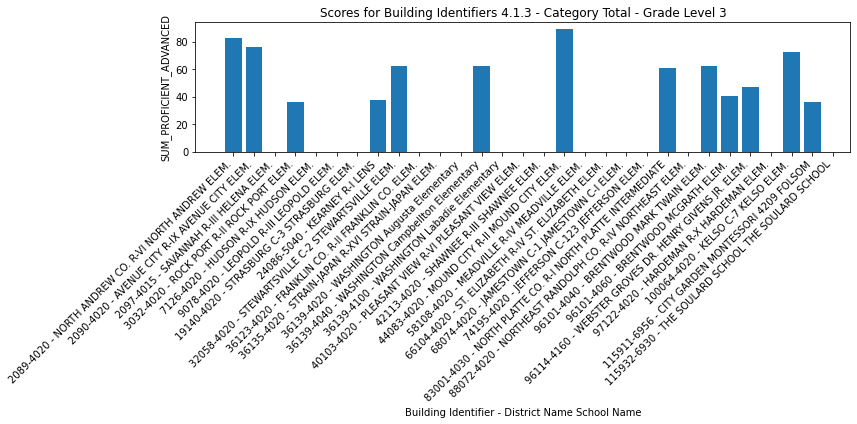

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

def visualize_scores(file_path):
    # Read the data from the file
    df = pd.read_excel(file_path)

    # Filter the data based on the given conditions
    filtered_data = df[
        (df['comparison_code_y'] == '1.1.3') &
        (df['CATEGORY'] == 'Total') &  # Updated column name to 'CATEGORY'
        (df['GRADE_LEVEL'] == 3) &
        (df['CONTENT_AREA'].isin(['Eng. Language Arts', 'Mathematics']))
    ]

    # Create the bar chart
    plt.figure(figsize=(12, 6))
    plt.bar(filtered_data['building_identifier'] + ' - ' + filtered_data['DISTRICT_NAME'] + ' ' + filtered_data['SCHOOL_NAME'],
            filtered_data['SUM_PROFICIENT_ADVANCED'])
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Building Identifier - District Name School Name')
    plt.ylabel('SUM_PROFICIENT_ADVANCED')
    plt.title('Scores for Building Identifiers 4.1.3 - Category Total - Grade Level 3')
    plt.tight_layout()
    plt.show()

# Call the function to visualize the scores
file_path_map_eoc = "C:/Users/kaleach/OneDrive - The School District of Springfield R-12/Desktop/Grad_School/SY2023/44-620/Module7/620-mod7/MAP_EOC_FY_2022.xlsx"
visualize_scores(file_path_map_eoc)
